In [1]:
# imprtant library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
def explore_dataset(data, data_filename='Data csv'):
    """
    In explore_dataset function we are doing all the things that given below:
    - checking shape of dataset
    - checking column names that exist in dataset
    - checking null values 
    - checking overall information about dataset using info() method
    - checking dtypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    
    print("Total Rows: {}".format(data.shape[0]))
    print("\nTotal Columns: {}".format(data.shape[1]))
    print("\nColumns: {}".format(data.columns.tolist()))
    print("\nTotal Null Values: {}".format(data.isnull().sum().sum()))
    print(data.isnull().sum())
    print(" ")
    print("\t\tOverall Information about Dataset\n")
    print(data.info())
    print(" ")
    print("\t\tDtype of all Columns\n")
    print(data.dtypes)

In [3]:
df = pd.read_csv('data (3).csv')
explore_dataset(df)

			EDA Dataset: Data csv
Total Rows: 8371

Total Columns: 17

Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

Total Null Values: 0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64
 
		Overall Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   h

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [5]:
# Descriptive Anaylsis
# The## Exploratory Data Anaylsis describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types):
# number of non-missing values, mean, standard deviation,range, median, 0.25 and 0.75 quartiles. 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000
mean,41.197467,1517.811134,15.588460,372.898698,2.512603,49.911958,0.823677
std,11.809300,3225.312218,8.406768,346.706743,2.734037,107.308417,2.315285
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,116.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,532.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1694.000000,21.000000,504.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3284.000000,63.000000,854.000000,58.000000


In [6]:
# In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest
# in the include parameter.
df.describe(include=['bool','object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,8371,8371,8371,8371,8371,8371,8371,8371,8371,8371
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,1923,4744,4113,8244,4354,7250,6041,2135,6269,4428


In [7]:
# converting categorical columns into numarical columns
from sklearn.preprocessing import StandardScaler, LabelEncoder
# label encoding
labelEnc = LabelEncoder()
for i in list(df.columns):
    if df[i].dtype == 'object':
        df[i] = labelEnc.fit_transform(df[i])

In [8]:
# Begin with a train/test split. Using the test set for final evaluation only.
## Extract Dependent and Independent Variables
from sklearn.model_selection import train_test_split,GridSearchCV
X = df.drop('deposit', axis = 1)
Y = df['deposit']
## Split Train Test
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(6696, 16)
(1675, 16)


In [9]:
import time
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [2]:
# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

C:\Users\jigna\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(model,predictions, y_test_set, model_name):
    #kfold cross validation
    kfold = KFold(n_splits=10, random_state=42, shuffle= True)
    
    # Print model evaluation to predicted result    
    start_time = time.time()
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("Precision on validation set: {:.4f}".format(precision_score(y_test_set, predictions, average='macro')))    
    print ("Recall on validation set: {:.4f}".format(recall_score(y_test_set, predictions, average='macro')))
    print ("F1_Score on validation set: {:.4f}".format(f1_score(y_test_set, predictions, average='macro')))
    
    y_score = model.predict_proba(X_test)
    fpr, tpr, th = roc_curve(y_test_set, y_score[:,1])

    roc_auc = auc(fpr, tpr)
    print ("ROC_AUC on validation set: {:.4f}".format(roc_auc))
    scores = cross_validate(model, X, Y, cv=kfold, scoring='accuracy')
    
    print ("KFold Cross Validation on validation set: {:.4f}".format(scores['test_score'].mean()))
    
    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    
    print("="*30)
    print ("\tConfusion Matrix",)
    print("="*30)


    cmtx = pd.DataFrame(
    confusion_matrix(y_test_set, predictions, labels=[1, 0]),
    index=['real:1', 'real:0'], columns=['predict:1', 'predict:0'])
    print(cmtx)



    cm = confusion_matrix(y_test_set, predictions,labels=[1, 0])
    
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum()) for item in cm.flatten()]

        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))

    sns.heatmap(cm, annot=labels, fmt="",yticklabels=[1,0],xticklabels=[1,0])
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    end = round(time.time()-start_time,3)
    results = [accuracy_score(y_test_set, predictions),precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro'),roc_auc,scores['test_score'].mean(),end]
    return results

========== DecisionTreeClassifier ==========

Accuracy on validation set: 0.7552
Precision on validation set: 0.7541
Recall on validation set: 0.7529
F1_Score on validation set: 0.7534
ROC_AUC on validation set: 0.7529
KFold Cross Validation on validation set: 0.7709

Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       899
           1       0.74      0.72      0.73       776

    accuracy                           0.76      1675
   macro avg       0.75      0.75      0.75      1675
weighted avg       0.75      0.76      0.75      1675

	Confusion Matrix
        predict:1  predict:0
real:1        560        216
real:0        194        705


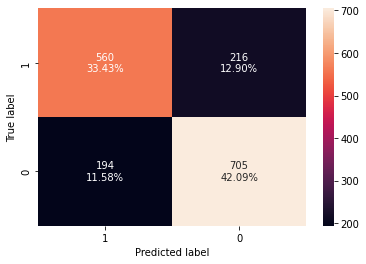

In [12]:
from sklearn.tree import DecisionTreeClassifier
# evaluating the model
dt = DecisionTreeClassifier(criterion='gini')                         
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)
results_mp = modelEvaluation(dt,prediction, y_test,"DecisionTreeClassifier")

In [13]:
imp_dict = {attr: dt.feature_importances_[i] for i, attr in enumerate(X.columns.tolist())}
features_dic = {k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}
features_dic

{'duration': 0.3545812618522405,
 'balance': 0.09690074627003387,
 'month': 0.08014588675071782,
 'age': 0.07611206962805263,
 'day': 0.06851975970525405,
 'contact': 0.061579288047503955,
 'pdays': 0.05660238460444379,
 'poutcome': 0.041429566855547974,
 'housing': 0.035548135530147545,
 'job': 0.030940344049920264,
 'campaign': 0.02762554745989733,
 'previous': 0.021370456475254353,
 'education': 0.020367486557118286,
 'marital': 0.019687888813049472,
 'loan': 0.0081897623148639,
 'default': 0.0003994150859543232}

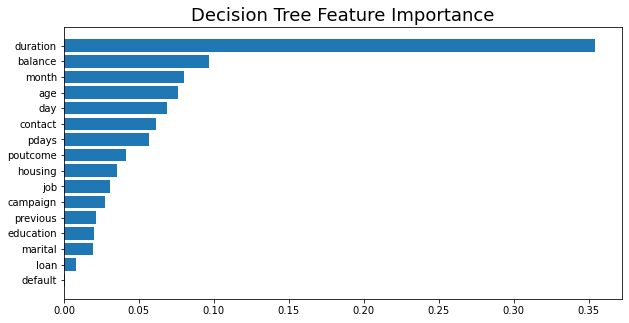

In [14]:
# let’s sort the features, and plot graph
plt.figure(figsize=(10,5))
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], dt.feature_importances_[sorted_idx])
plt.title("Decision Tree Feature Importance", fontsize=18)
plt.show()

ROC_AUC score : 0.752927078196851


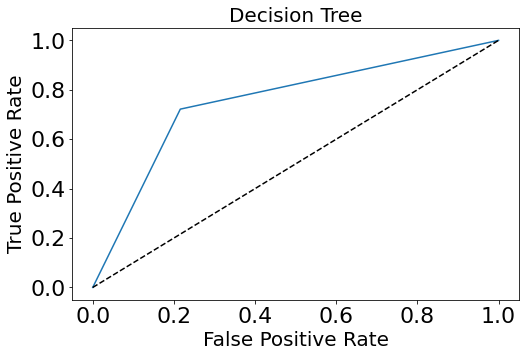

In [15]:
y_score = dt.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print("ROC_AUC score :",roc_auc)
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)
plt.title("Decision Tree", fontsize=20)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [16]:
# Feature scaling marks the end of the data preprocessing in Machine Learning. It is a method to standardize the independent variables of a dataset within a specific range.
# In other words, feature scaling limits the range of variables so that you can compare them on common grounds.
# standardization our data that better for in model prediction because values lies in a specific range (0,1)
st_x= StandardScaler()  
X_train_std= st_x.fit_transform(X_train) 
X_test_std= st_x.transform(X_test) 

In [17]:
# Neural Network
from sklearn.neural_network import MLPClassifier

def hyperNN(X_train, y_train, X_test, y_test, title):

    f1_test = []
    f1_train = []
    hlist = np.linspace(1,150,30).astype('int')
    for i in hlist:         
            clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                                learning_rate_init=0.05, random_state=100)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test))
            f1_train.append(f1_score(y_train, y_pred_train))
      
    plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Hidden Units')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    
def NNGridSearchCV(X_train, y_train):
    #parameters to search:
    #number of hidden units
    #learning_rate
    h_units = [5, 10, 20, 30, 40, 50, 75, 100]
    learning_rates = [0.01, 0.05, .1]
    param_grid = {'hidden_layer_sizes': h_units, 'learning_rate_init': learning_rates}

    net = GridSearchCV(estimator = MLPClassifier(solver='adam',activation='logistic',random_state=100),
                       param_grid=param_grid, cv=10)
    net.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(net.best_params_)
    return net.best_params_['hidden_layer_sizes'], net.best_params_['learning_rate_init']

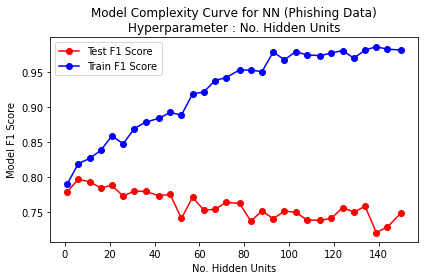

Per Hyperparameter tuning, best parameters are:
{'hidden_layer_sizes': 75, 'learning_rate_init': 0.01}


In [18]:
hyperNN(X_train_std, y_train, X_test_std, y_test,title="Model Complexity Curve for NN (Phishing Data)\nHyperparameter : No. Hidden Units")
h_units, learn_rate = NNGridSearchCV(X_train, y_train)
estimator_ann = MLPClassifier(hidden_layer_sizes=(h_units,), solver='adam', activation='logistic', 
                               learning_rate_init=learn_rate, random_state=100)

In [19]:
estimator_ann.fit(X_train_std,y_train)
a = estimator_ann.loss_curve_

========== Artifical Neural Network ==========

Accuracy on validation set: 0.7827
Precision on validation set: 0.7828
Recall on validation set: 0.7793
F1_Score on validation set: 0.7803
ROC_AUC on validation set: 0.5938
KFold Cross Validation on validation set: 0.7533

Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       899
           1       0.78      0.73      0.76       776

    accuracy                           0.78      1675
   macro avg       0.78      0.78      0.78      1675
weighted avg       0.78      0.78      0.78      1675

	Confusion Matrix
        predict:1  predict:0
real:1        569        207
real:0        157        742


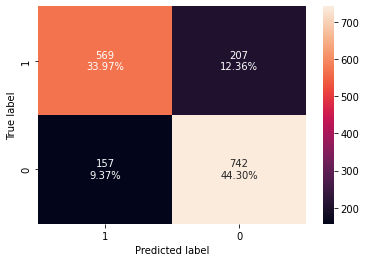

In [20]:
predictions = estimator_ann.predict(X_test_std)
results_ann = modelEvaluation(estimator_ann,predictions, y_test, "Artifical Neural Network")

ROC_AUC score : 0.8673812827540336


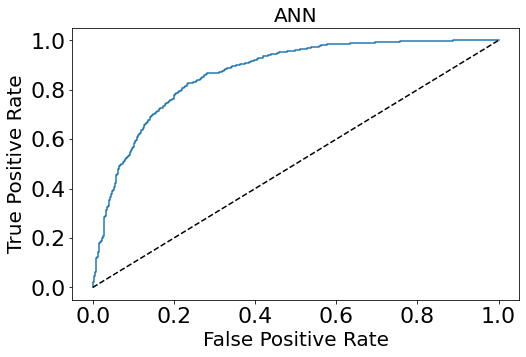

In [21]:
y_score = estimator_ann.predict_proba(X_test_std)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print("ROC_AUC score :",roc_auc)
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.title("ANN", fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

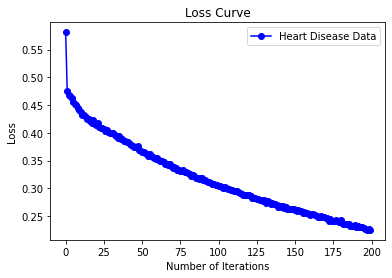

In [22]:
b = estimator_ann.loss_curve_

plt.figure()
plt.title("Loss Curve")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.plot(a, 'o-', color="b", label="Heart Disease Data")
plt.legend(loc="best")
plt.show()

In [22]:
# Conclusion
# First, since our objective variable is categorical and we are developing a model with a basic baseline, we use a decision tree classifier.
# indicates that we have a classification issue, therefore we will use a decision tree classifier as our first model and see that we only get 75% accuracy. 
# Now we We apply a deep learning neural network, do data scaling, and then perform hyperparameter tuning in order to optimise this.
# to obtain the optimal settings and successful outcomes.
# After that, we will achieve 78% accuracy, which we then build upon to get even better outcomes.